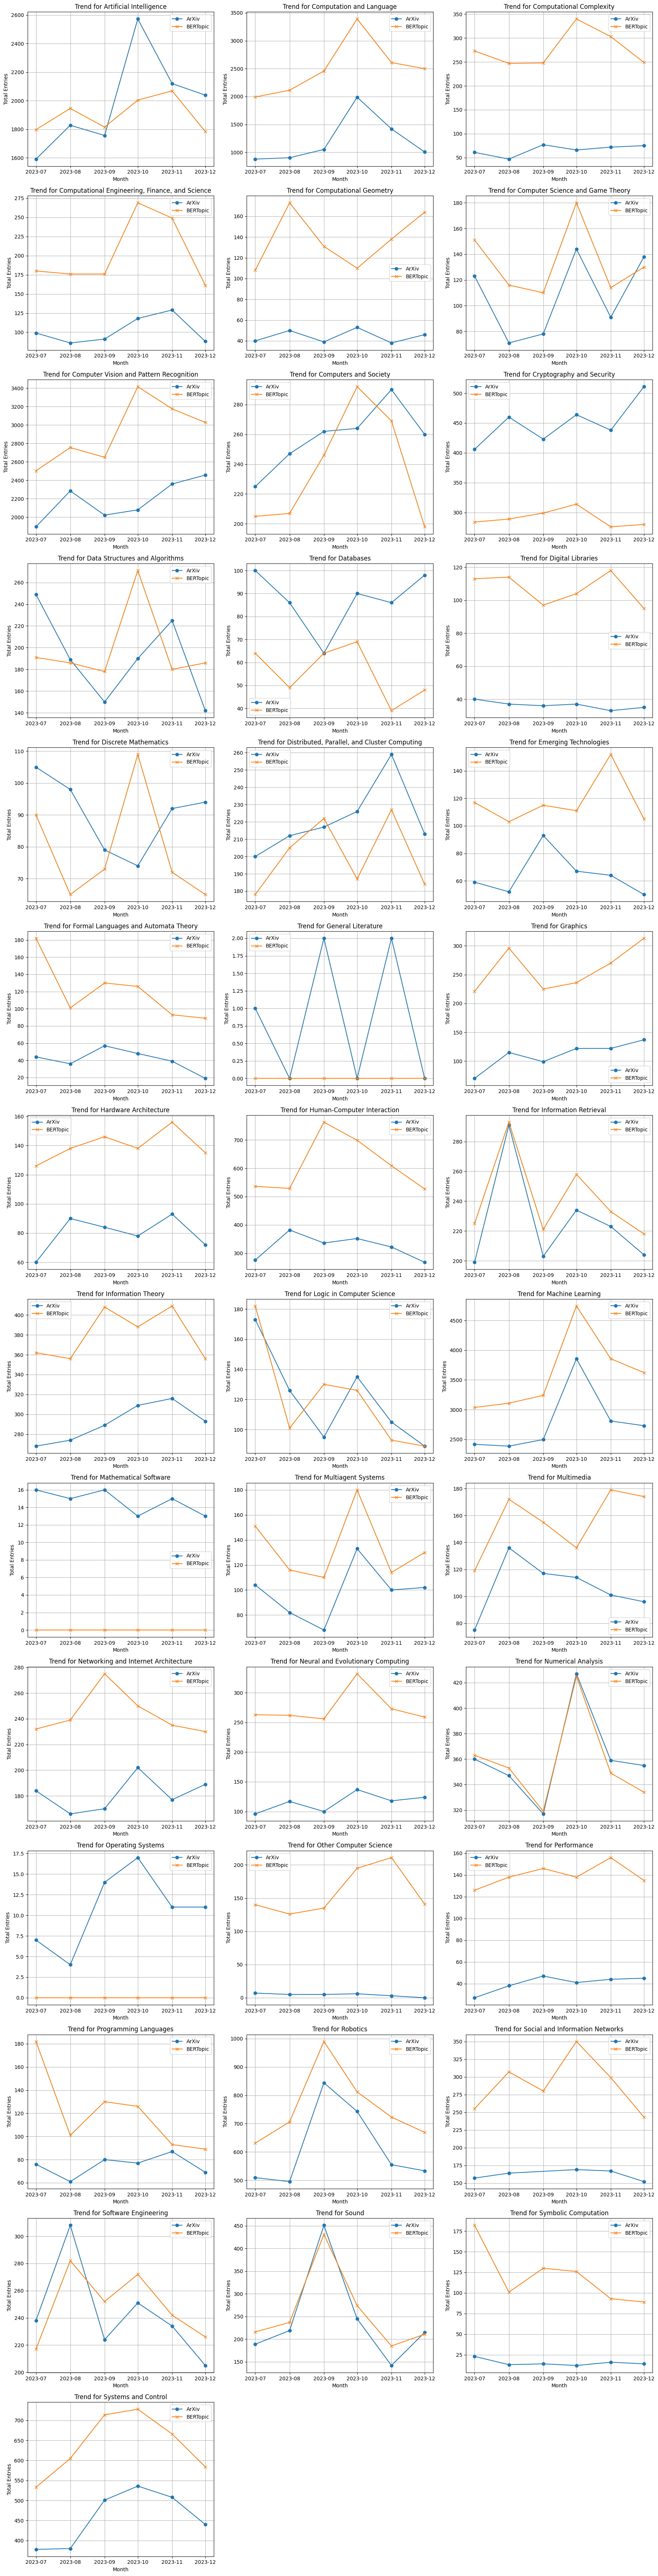

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
arxiv_df = pd.read_csv('arxiv_second_semester.csv')
bertopic_df = pd.read_csv('BERTopic_second_semester.csv')

# Combine 'Year' and 'Month' into a datetime column
arxiv_df['Date'] = pd.to_datetime(arxiv_df['Year'].astype(str) + '-' + arxiv_df['Month'].astype(str))
bertopic_df['Date'] = pd.to_datetime(bertopic_df['Year'].astype(str) + '-' + bertopic_df['Month'].astype(str))

# Group the data by Category and Date, summing Total Entries
arxiv_grouped = arxiv_df.groupby(['Category', 'Date']).sum().reset_index()
bertopic_grouped = bertopic_df.groupby(['Category', 'Date']).sum().reset_index()

# Create a list of unique categories for iteration
categories = arxiv_grouped['Category'].unique()

# Set up the plot grid
n_cols = 3
n_rows = -(-len(categories) // n_cols)  # ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# Plot each category
for i, category in enumerate(categories):
    ax = axes[i]
    
    # Filter data for each category
    arxiv_data = arxiv_grouped[arxiv_grouped['Category'] == category]
    bertopic_data = bertopic_grouped[bertopic_grouped['Category'] == category]
    
    # Plotting the data
    ax.plot(arxiv_data['Date'], arxiv_data['Total Entries'], label='ArXiv', marker='o')
    ax.plot(bertopic_data['Date'], bertopic_data['Total Entries'], label='BERTopic', marker='x')
    
    # Title and labels
    ax.set_title(f'Trend for {category}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Total Entries')
    ax.legend()
    ax.grid(True)

# Hide any unused subplots if categories < n_cols * n_rows
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_categories(arxiv_df, bertopic_df, selected_categories=None):
    # Combine 'Year' and 'Month' into a datetime column
    arxiv_df['Date'] = pd.to_datetime(arxiv_df['Year'].astype(str) + '-' + arxiv_df['Month'].astype(str))
    bertopic_df['Date'] = pd.to_datetime(bertopic_df['Year'].astype(str) + '-' + bertopic_df['Month'].astype(str))

    # Group the data by Category and Date, summing Total Entries
    arxiv_grouped = arxiv_df.groupby(['Category', 'Date']).sum().reset_index()
    bertopic_grouped = bertopic_df.groupby(['Category', 'Date']).sum().reset_index()

    # Filter categories based on selected_categories
    if selected_categories is not None:
        arxiv_grouped = arxiv_grouped[arxiv_grouped['Category'].isin(selected_categories)]
        bertopic_grouped = bertopic_grouped[bertopic_grouped['Category'].isin(selected_categories)]
    else:
        # Use all categories if none are specified
        selected_categories = arxiv_grouped['Category'].unique()

    # Set up the plot grid
    n_cols = 2
    n_rows = -(-len(selected_categories) // n_cols)  # Ceiling division
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()

    # Plot each category
    for i, category in enumerate(selected_categories):
        ax = axes[i]

        # Filter data for each category
        arxiv_data = arxiv_grouped[arxiv_grouped['Category'] == category]
        bertopic_data = bertopic_grouped[bertopic_grouped['Category'] == category]

        # Plotting the data
        ax.plot(arxiv_data['Date'], arxiv_data['Total Entries'], label='ArXiv', marker='o')
        ax.plot(bertopic_data['Date'], bertopic_data['Total Entries'], label='BERTopic', marker='x')

        # Title and labels
        ax.set_title(f'Tren {category}')
        ax.set_xlabel('Bulan')
        ax.set_ylabel('Jumlah Dokumen')
        ax.legend()
        ax.grid(True)

    # Hide any unused subplots
    for j in range(len(selected_categories), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

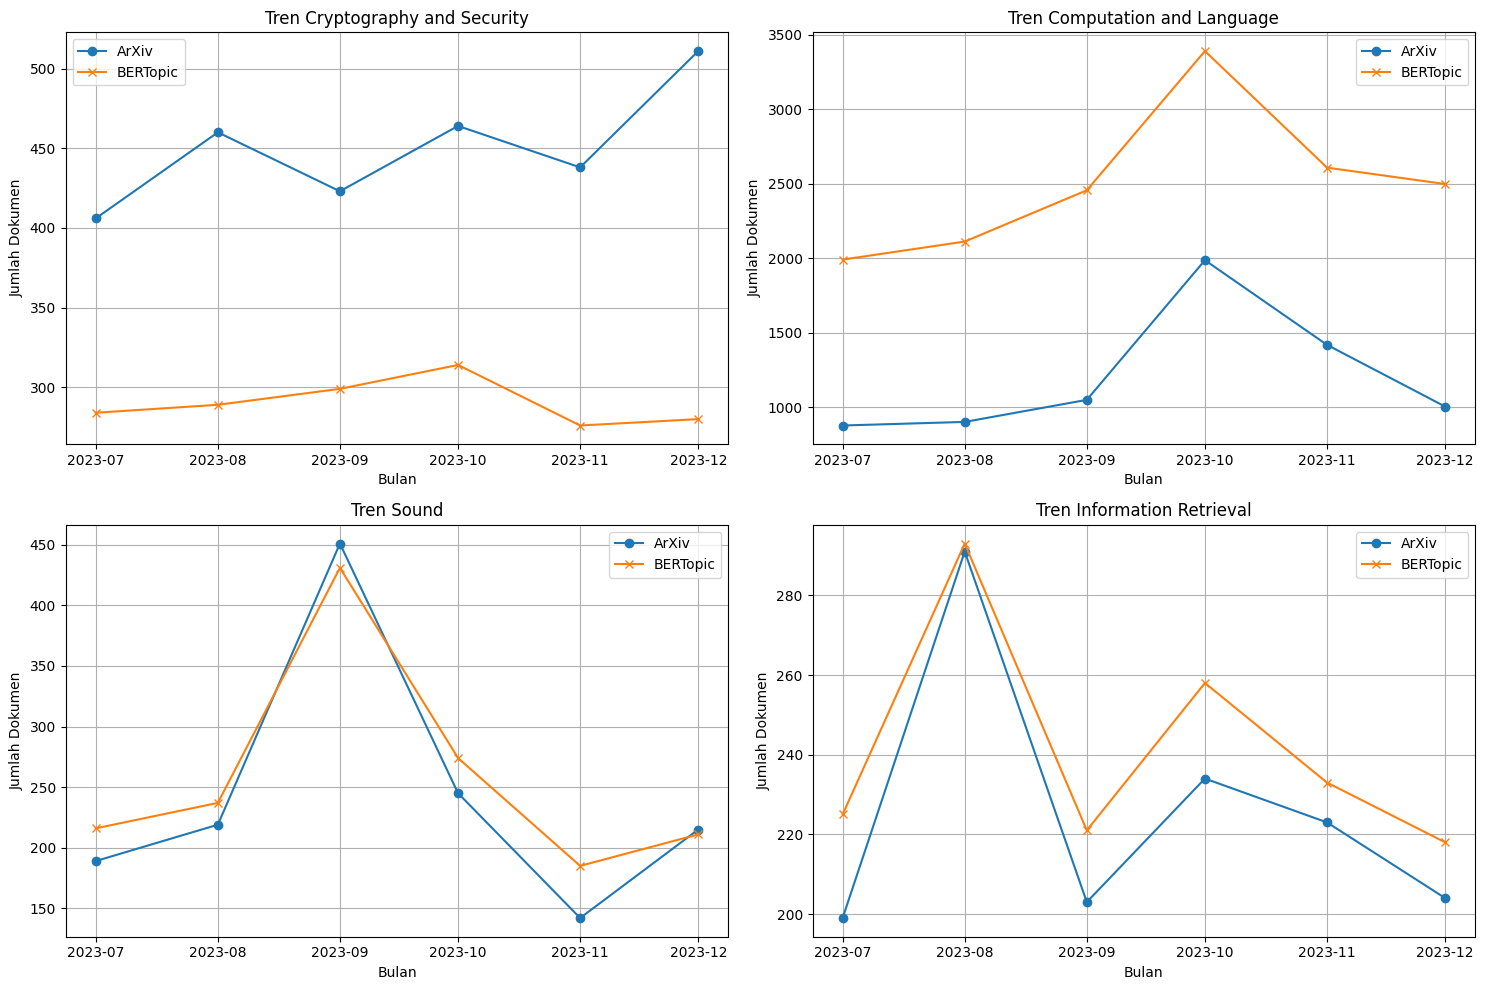

In [3]:
arxiv_df2 = pd.read_csv('arxiv_second_semester.csv')
bertopic_df2 = pd.read_csv('BERTopic_second_semester.csv')

# Plot only selected categories
selected_categories = ["Cryptography and Security", "Computation and Language", "Sound", "Information Retrieval"]
plot_categories(arxiv_df2, bertopic_df2, selected_categories)